In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine


user = 'postgres'
password ='admin123'
host = 'localhost'            
port = '5432'
database = 'test'
table_name = "agri_data_cleaned"      


engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")
query = "SELECT * FROM agri_data_cleaned"
df = pd.read_sql(query, con=engine)




In [3]:
# 1.Top 7 Rice Producing States (Bar Plot)
rice_states = df.groupby("state_name")["rice_production_1000_tons"].sum().nlargest(7).reset_index()
fig1 = px.bar(rice_states, x="state_name", y="rice_production_1000_tons", title="Top 7 Rice Producing States")
fig1.show()

In [13]:
# 2. Top 5 Wheat Producing States (Donut Chart)
wheat_states = df.groupby("state_name")["wheat_production_1000_tons"].sum().nlargest(5).reset_index()
fig2 = px.pie(
    wheat_states,
    names="state_name",
    values="wheat_production_1000_tons",
    title="Top 5 Wheat Producing States",
    hole=0.4
)

fig2.show()

In [7]:
# 3. Wheat Production % (Pie)
fig3 = px.pie(wheat_states, values="wheat_production_1000_tons", names="state_name", title="Wheat Production Share")
fig3.show()

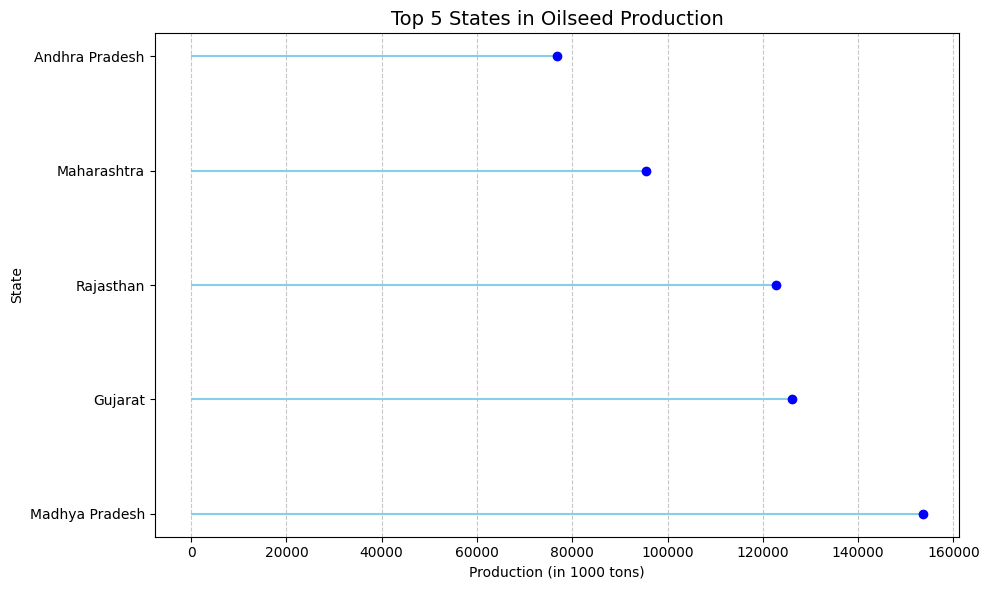

In [9]:
# 4.Top 5 Oilseed Producing States (Lollypop Chart)
top_oilseed = df.groupby("state_name")["oilseeds_production_1000_tons"].sum().nlargest(5)
plt.figure(figsize=(10,6))
plt.hlines(y=top_oilseed.index, xmin=0, xmax=top_oilseed.values, color='skyblue')
plt.plot(top_oilseed.values, top_oilseed.index, "o", color ="blue")

plt.title("Top 5 States in Oilseed Production", fontsize=14)
plt.xlabel("Production (in 1000 tons)")
plt.ylabel("State")

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
# 5.Top 7 Sunflower Producing States (Bar Plot)
sunflower_states = df.groupby("state_name")["sunflower_production_1000_tons"].sum().nlargest(7).reset_index()
fig5 = px.bar(sunflower_states, x="state_name", y="sunflower_production_1000_tons", title="Top 7 Sunflower Producing States")
fig5.show()

In [24]:
# 6.India's Sugarcane Production Over Last 50 Years (Line Plot)
sugarcane_trend = df.groupby("year")["sugarcane_production_1000_tons"].sum().reset_index()
fig6 = px.line(
    sugarcane_trend, 
    x="year", 
    y="sugarcane_production_1000_tons", 
    title="India's Sugarcane Production (Last 50 Years)"
)
fig6.show()



In [27]:
# 7.Rice vs. Wheat Production (Last 50 Years) – Line Chart
rice_wheat = df.groupby("year")[["rice_production_1000_tons", "wheat_production_1000_tons"]].sum().reset_index()
fig7 = px.line(rice_wheat, x="year", y=["rice_production_1000_tons", "wheat_production_1000_tons"], title="Rice vs Wheat Production Over 50 Years")
fig7.show()

In [ ]:
# 8.Rice Production by Districts in West Bengal (Treemap)
wb_districts = df[df.state_name == "West Bengal"].groupby("dist_name")["rice_production_1000_tons"].sum().nlargest(10).reset_index()
fig8 = px.treemap(
    wb_districts, 
    path=["dist_name"], 
    values="rice_production_1000_tons",
    title="Top Rice Producing Districts in West Bengal (Treemap)"
)
fig8.show()


In [ ]:
# 9.Top 10 Wheat Production Years in Uttar Pradesh (Funnel Chart)

up_wheat = df[df.state_name == "Uttar Pradesh"] \
    .groupby("year")["wheat_production_1000_tons"] \
    .sum().nlargest(10).reset_index()

# Sort for funnel shape
up_wheat = up_wheat.sort_values("wheat_production_1000_tons", ascending=False)

# Create Funnel Chart with labels inside bars
fig9 = px.funnel(
    up_wheat,
    y="year",
    x="wheat_production_1000_tons",
    title="Top 10 Wheat Production Years in Uttar Pradesh (Funnel Chart)",
    text="wheat_production_1000_tons"  # Show values inside bars
)

# Update layout for clarity
fig9.update_traces(textposition="inside", textfont_size=14)
fig9.update_layout(
    yaxis_title="Year",
    xaxis_title="Wheat Production (in 1000 tons)",
    font=dict(size=14),
    uniformtext_minsize=12,
    uniformtext_mode='hide'
)

fig9.show()



<Axes: title={'center': ' Pearl Millet vs Finger Millet Production Over 50 Years'}, xlabel='year'>

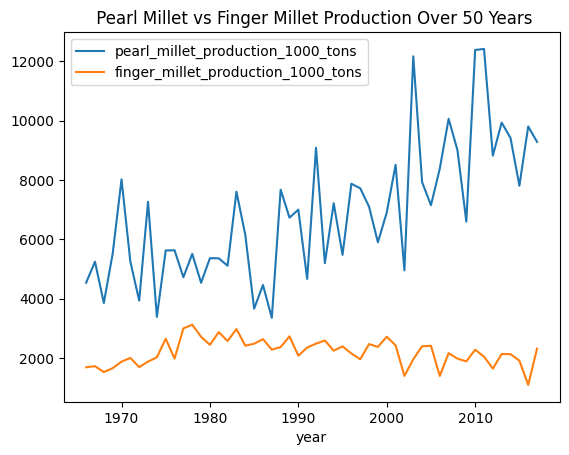

In [18]:
# 10. Millet Production Over the Last 50 Years (Line Plot)
df.groupby("year")[["pearl_millet_production_1000_tons", "finger_millet_production_1000_tons"]].sum().plot(
    kind="line",
    title=" Pearl Millet vs Finger Millet Production Over 50 Years"
)


In [ ]:
# 11.Rice vs Wheat Yield Across States (HorizontalBar Chart)

yields = df.groupby("state_name")[["rice_yield_kg_per_ha", "wheat_yield_kg_per_ha"]].mean().reset_index()
fig11 = px.bar(
    yields, 
    y="state_name", 
    x=["rice_yield_kg_per_ha", "wheat_yield_kg_per_ha"], 
    barmode="group",
    orientation="h",
    title="Rice vs Wheat Yield Across States (Horizontal Bar)"
)
fig11.show()


In [ ]:
# 12.Groundnut Production by Top 7 States (Sunburst Plot)
# Step 1: Group, aggregate and convert to DataFrame
top_groundnut = df.groupby("state_name")["groundnut_production_1000_tons"] \
                  .sum().nlargest(7).reset_index()

# Step 2: Sunburst chart using proper column names


fig12 = px.sunburst(
    top_groundnut,
    path=["state_name"],  # now a column, not an index
    values="groundnut_production_1000_tons",
    title="Top 7 Groundnut Producing States (Sunburst Chart)"
)
fig12.show()



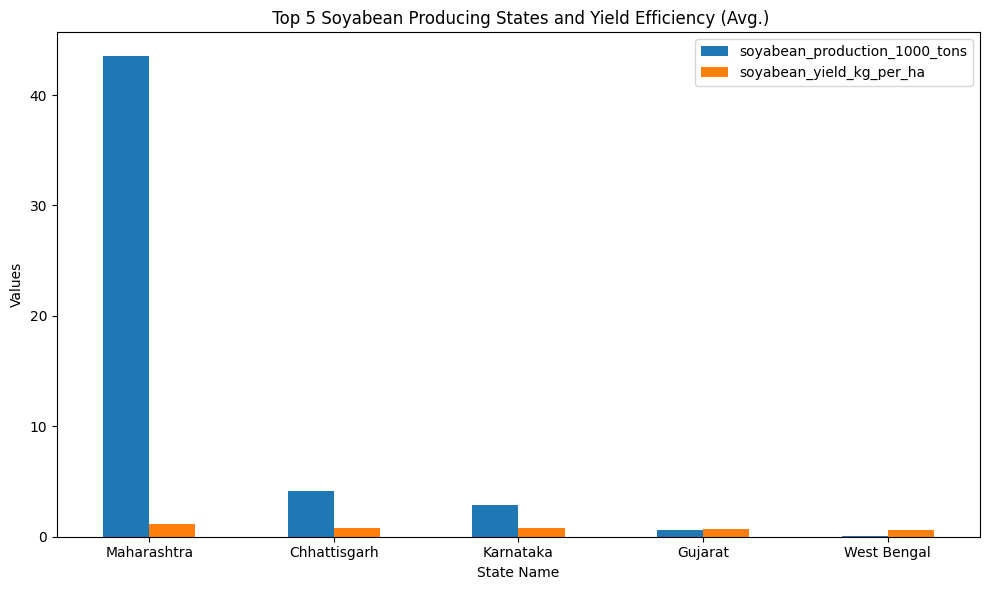

In [ ]:
# 13.Soybean Production by Top 5 States and Yield Efficiency(Vertical Bar Chart )

df["soyabean_yield_kg_per_ha"] = (
    (df["soyabean_production_1000_tons"] * 1000) /
    (df["soyabean_area_1000_ha"] * 1000)
)

avg_soyabean = df.groupby("state_name")[[
    "soyabean_production_1000_tons",
    "soyabean_yield_kg_per_ha"
]].mean()

top5_soyabean = (
    avg_soyabean
    .replace([np.inf, -np.inf], np.nan)
    .dropna(subset=["soyabean_production_1000_tons", "soyabean_yield_kg_per_ha"])
    .nlargest(5, "soyabean_production_1000_tons")
)

ax = top5_soyabean.plot(
    kind="bar",
    title=" Top 5 Soyabean Producing States and Yield Efficiency (Avg.)",
    figsize=(10, 6),
    rot=0
)

ax.set_ylabel("Values")
ax.set_xlabel("State Name")
plt.tight_layout()
plt.show()


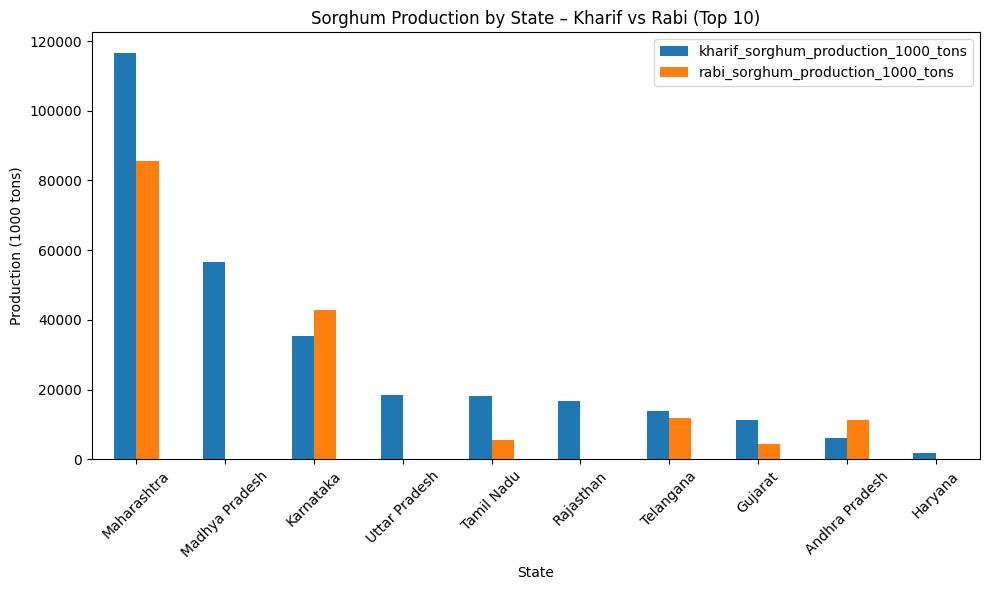

In [ ]:
#14. Top 10 Sorghum Production (Kharif and Rabi) by Region (Vertical Bar Chart )

sorghum_summary = df.groupby("state_name")[[
    "kharif_sorghum_production_1000_tons",
    "rabi_sorghum_production_1000_tons"
]].sum().sort_values(by="kharif_sorghum_production_1000_tons", ascending=False)

ax = sorghum_summary.head(10).plot(
    kind="bar",
    figsize=(10, 6),
    title="Sorghum Production by State – Kharif vs Rabi (Top 10)",
    rot=45
)

ax.set_ylabel("Production (1000 tons)")
ax.set_xlabel("State")
plt.tight_layout()
plt.show()


In [ ]:
# 15. Oilseed Production in Major States (Polar Area Chart)
top_oilseed_states = df.groupby("state_name")["oilseeds_production_1000_tons"] \
                  .sum().nlargest(7).reset_index()

fig15 = go.Figure(go.Barpolar(
    r=top_oilseed_states["oilseeds_production_1000_tons"],
    theta=top_oilseed_states["state_name"],
    marker_color=px.colors.sequential.YlOrBr,
    opacity=0.85
))

fig15.update_layout(
    title="Top Oilseed Producing States – Polar Area Chart",
    polar=dict(
        radialaxis=dict(showticklabels=True, ticks='outside')
    ),
    showlegend=False
)

fig15.show()

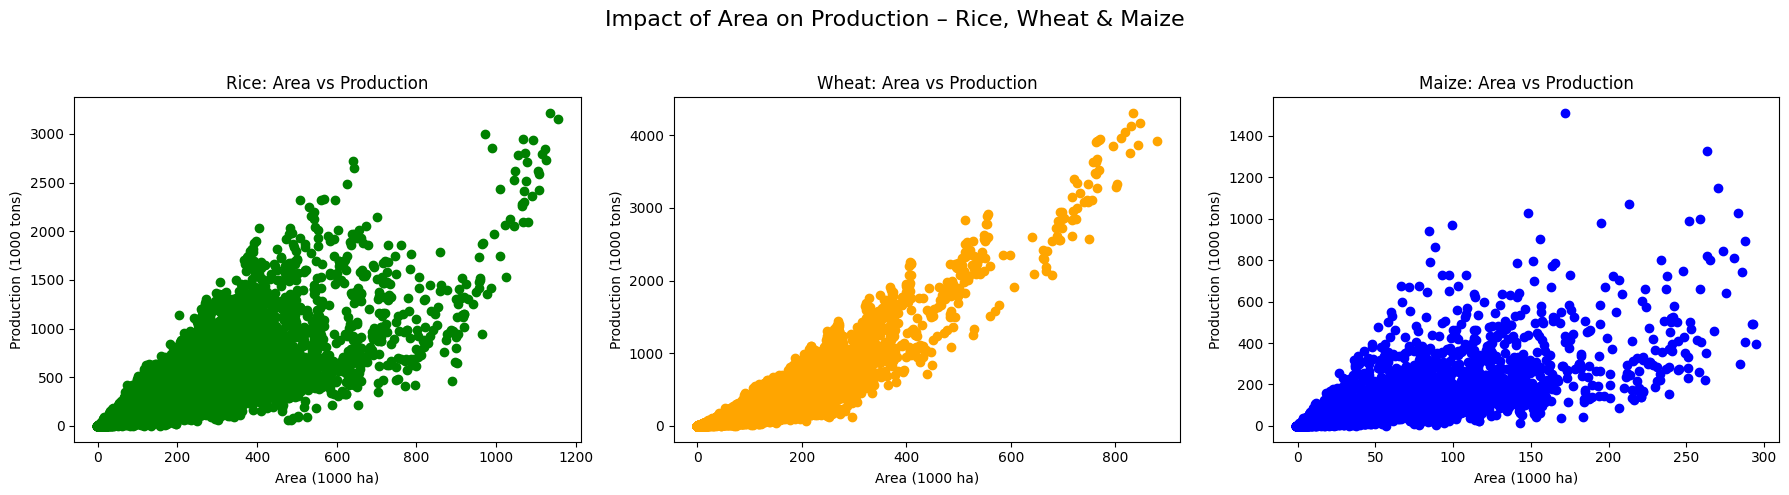

In [45]:
#16.Impact of Area Cultivated on Production (Rice, Wheat, Maize)
plt.figure(figsize=(18, 5))

#  RICE - Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(df["rice_area_1000_ha"], df["rice_production_1000_tons"], color="green")
plt.title("Rice: Area vs Production")
plt.xlabel("Area (1000 ha)")
plt.ylabel("Production (1000 tons)")

#  WHEAT - Scatter plot
plt.subplot(1, 3, 2)
plt.scatter(df["wheat_area_1000_ha"], df["wheat_production_1000_tons"], color="orange")
plt.title("Wheat: Area vs Production")
plt.xlabel("Area (1000 ha)")
plt.ylabel("Production (1000 tons)")

# MAIZE - Scatter plot
plt.subplot(1, 3, 3)
plt.scatter(df["maize_area_1000_ha"], df["maize_production_1000_tons"], color="blue")
plt.title("Maize: Area vs Production")
plt.xlabel("Area (1000 ha)")
plt.ylabel("Production (1000 tons)")

#  Final adjustments
plt.suptitle("Impact of Area on Production – Rice, Wheat & Maize", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
